In [187]:
import matplotlib as mpl
import matplotlib.pyplot as plt
font = {"family":"AppleGothic"}
mpl.rc('font', **font)

In [25]:
import json

f = open("./result/300-200/log", 'r')
json_data = json.load(f) #JSON形式で読み込む
loss_ex = []
perp_ex = []
bleu_ex = []
for j in json_data:
    if 'validation/main/bleu' in j:
        bleu_ex.append(j['validation/main/bleu'])
    loss_ex.append(j['main/loss'])
    perp_ex.append(j['main/perp'])

In [50]:
f = open("../chiner_seq2seq/result/300-200/log", 'r')
json_data = json.load(f) #JSON形式で読み込む
loss = []
perp = []
bleu = []
I = 0
B = 0
for j in json_data:
    if I == len(loss_ex):
        break
    if 'validation/main/bleu' in j and B != len(bleu_ex):
        bleu.append(j['validation/main/bleu'])
        B += 1
    loss.append(j['main/loss'])
    perp.append(j['main/perp'])
    I += 1

In [148]:
print("len(loss_ex) = {}, len(perp_ex) = {}, len(bleu_ex) = {}".format(len(loss_ex), len(perp_ex), len(bleu_ex)))
print("len(loss) = {}, len(perp) = {}, len(bleu) = {}".format(len(loss), len(perp), len(bleu)))

len(loss_ex) = 4457, len(perp_ex) = 4457, len(bleu_ex) = 199
len(loss) = 4457, len(perp) = 4457, len(bleu) = 199


In [189]:
# roll loss 
%matplotlib inline
import pandas as pd
import matplotlib as mpl
plt.figure()
df_ex = pd.DataFrame({'existing': loss_ex})
df_no = pd.DataFrame({'loss_ex': loss})
roll_ex = df_ex.rolling(200, center=True).mean()
roll = df_no.rolling(100, center=True).mean()
df = roll_ex
df['proposed'] = roll
df['iteration'] = [i for i in range(len(loss))]
df.plot(x='iteration', y=['proposed', 'existing'], title = 'loss', grid = True)
plt.savefig('loss.png')
plt.close('all')

/opt/pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


/opt/pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


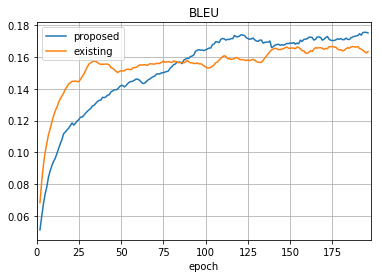

In [191]:
%matplotlib inline
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages


df = pd.DataFrame({'existing': bleu_ex})
roll = df.rolling(5, center=True).mean()
df_ex = pd.DataFrame({'proposed': bleu})
roll_ex = df_ex.rolling(5, center=True).mean()
df['epoch'] = [i for i in range(199)]
df['existing'] = roll
df['proposed'] = roll_ex
# df_s['bleu_ex'] = bleu_ex
pdf = PdfPages('loss.pdf')
plt.figure()
df.plot(x='epoch', y=['proposed', 'existing'], title = 'BLEU', grid = True)
pdf.savefig()
pdf.close()

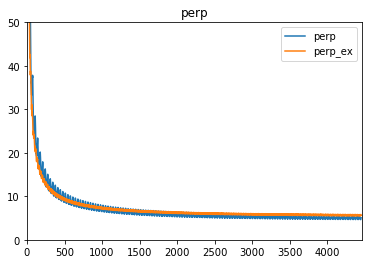

In [136]:
%matplotlib inline
import pandas as pd
df = pd.DataFrame({'perp': perp})
df_ex = pd.DataFrame({'perp_ex': perp_ex})
roll = df.rolling(20, center=True).mean()
roll_ex = df_ex.rolling(20, center=True).mean()
df_s = roll
df_s['perp_ex'] = roll_ex
# df_s['bleu_ex'] = bleu_ex
df_s.plot(title = 'perp', ylim=[0, 50])
